In [1]:
from sympy import symbols, init_printing, simplify, solve
from mako.template import Template
from mako.runtime import Context
from StringIO import StringIO
from fdlib import *
init_printing()

In [2]:
dx, dt, x, y, z, t, c, h = symbols('dx dt x y z t c h')
U = IndexedBase('U')
# 2nd order approximation
n = 2
# list of variables
l = [x,y,z,t]

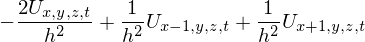

In [4]:
# get the derivative expressions
# using dx = dy = h
Uxx = Deriv(U,l,0,h,n)[2]
Uyy = Deriv(U,l,1,h,n)[2]
Uzz = Deriv(U,l,2,h,n)[2]
Utt = Deriv(U,l,3,dt,n)[2]
Uxx

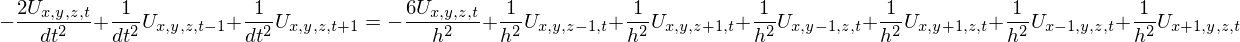

In [5]:
# 2d wave equation
eq = Eq(Utt, (Uxx+Uyy+Uzz))
eq

In [6]:
# generate C code for the body of the loop
code = print_myccode(U[x,y,z,t+1]) + "=" + print_myccode(simplify(solve(eq, U[x,y,z,t+1])[0]))
code

'U[x][y][z][t + 1]=(-6*pow(dt, 2)*U[x][y][z][t] + pow(dt, 2)*U[x][y][z - 1][t] + pow(dt, 2)*U[x][y][z + 1][t] + pow(dt, 2)*U[x][y - 1][z][t] + pow(dt, 2)*U[x][y + 1][z][t] + pow(dt, 2)*U[x - 1][y][z][t] + pow(dt, 2)*U[x + 1][y][z][t] + pow(h, 2)*(2*U[x][y][z][t] - U[x][y][z][t - 1]))/pow(h, 2)'

In [7]:
l = [x,t]
Uxx = Deriv(U,l,0,h,n)[2]
Utt = Deriv(U,l,1,dt,n)[2]

In [8]:
eq = Eq(Utt, Uxx)
code = print_myccode(U[x,t+1]) + "=" + print_myccode(simplify(solve(eq, U[x,t+1])[0]))
code

'U[x][t + 1]=(-2*pow(dt, 2)*U[x][t] + pow(dt, 2)*U[x - 1][t] + pow(dt, 2)*U[x + 1][t] + pow(h, 2)*(2*U[x][t] - U[x][t - 1]))/pow(h, 2)'

In [9]:
mytemplate = Template(filename='templates/tmpl1.c')
buf = StringIO()
ctx = Context(buf, loopbody=code)
mytemplate.render_context(ctx)

In [10]:
print(buf.getvalue())

// initialisation
for(int i=0; i<=Nx; i++)
    u[i][0] = I(x[i])
// separate calculation for first time step
for(int i=1; i<Nx; i++)
    u[i][1] = u[i][0]
        -0.5*C**2(u[i+1][0] - 2*u[i][0] + u[i-1][0])
// main loop
for(int n=1; n<Nt; n++){
    // boundary conditions
    u[n+1][0] = 0; u[n+1][Nx] = 0;
    for(int i=1; i<Nx; i++)
    // update mesh points at time = n+1
        U[x][t + 1]=(-2*pow(dt, 2)*U[x][t] + pow(dt, 2)*U[x - 1][t] + pow(dt, 2)*U[x + 1][t] + pow(h, 2)*(2*U[x][t] - U[x][t - 1]))/pow(h, 2)
}

